## The `matplotlib` Package

In [31]:
import utils
import importlib
import matplotlib.pyplot as plt
importlib.reload(utils)

utils.dummy_function()
utils.dummy_function_2()

poop
YOOOOOOOOOOOOOOOOO


## Warmup Task 2/8/22

In [6]:
# Build the table

header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
              ["toyota corolla", 75, 2711],
              ["ford pinto", 76, 3025],
              ["toyota corolla", 77, 2789]]

> Create a bar nad pie chart for the model year counts we computed with `get_frequencies()`

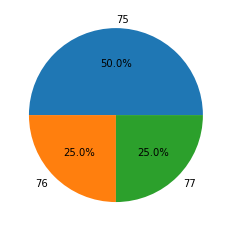

In [15]:
values, counts = utils.get_frequencies(msrp_table, header, "ModelYear")

def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    

pie_chart_example(values, counts)

> Add another histogram with mean=100 and stdev=5 to the same histogram figure. Is the new histogram going to be narrower or wider than the original (blue)?

The new histogram should be narrower because a smaller standard deviation means less spread.

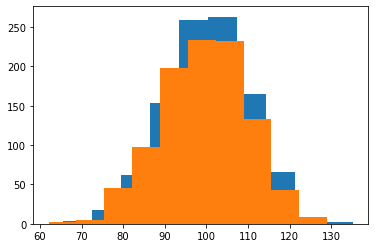

In [24]:
def histogram_example(data_1, data_2):
    # data is a 1D list of data values
    plt.figure()
    plt.hist(data_1, bins=10) # default is 10
    plt.hist(data_2, bins=10) # default is still 10
    plt.show()

    
# let's generate some random "normal" data
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma 
num_samples = 1000 
normal_data = np.random.normal(mean, stdev, num_samples)

# here is the new sample
new_mean = 100 # mu
new_stdev = 5 # sigma
new_normal_data = np.random.normal(new_mean, stdev, num_samples)
histogram_example(normal_data, new_normal_data)

> Add a parameter to `box_plot_example()` called `labels`, where `labels` is a 1D list of x-axis labels. Replace the 1 and 2 on the x-axis

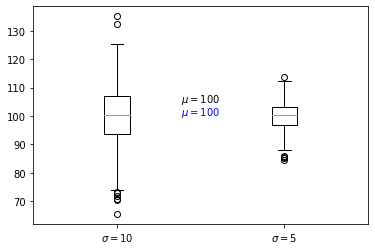

In [30]:
def box_plot_example(distributions, labels):
    # distributions: list of 1D lists of values
    plt.figure()
    plt.boxplot(distributions)

    plt.xticks(list(range(1, len(distributions) + 1)), labels)
    # boxes correspond to the 1st and 3rd quartiles
    # line in the middle of the box corresponds to the 2nd quartile (AKA median)
    # whiskers corresponds to +/- 1.5 * IQR
    # IQR: interquartile range (3rd quartile - 1st quartile)
    # circles outside the whiskers correspond to outliers
    
    # annotations
    # we want to add "mu=100" to the center of our figure
    # xycoords="data": default, specify the location of the label in the same
    # xycoords = "axes fraction": specify the location of the label in absolute
    # axes coordinates... 0,0 is the lower left corner, 1,1 is the upper right corner
    # coordinates as the plotted data
    plt.annotate("$\mu=100$", xy=(1.5, 105), xycoords="data", horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
                 horizontalalignment="center", color="blue")

    plt.show()
    
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
box_plot_example([normal_data, normal_data2], ['$\sigma=10$', '$\sigma=5$'])



## Group By Task

Our goal is to write a general groupby function that returns parallel lists

* group names: e.g. 75, 76, 77
* group subtables: e.g. all the 75 rows, all the 76 rows, all the 77 rows

We will group by to produce a boxplot of MSRPs grouped by model year
* x-axis: categorical attribute ModelYear
* y-axis: continuous attribute MSRP (e.g. one box/whisker for each ModelYear)

You can see the groupby implementation in `utils.py`.

In [34]:
importlib.reload(utils)
modelyear_names, modelyear_subtables = utils.groupby(msrp_table, header, 'ModelYear')
print('HEADER:', modelyear_names)
print()
print('DATA:')
print(modelyear_subtables)

HEADER: [75, 76, 77]

DATA:
[[['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], [['ford pinto', 76, 3025]], [['toyota corolla', 77, 2789]]]


TASK: We need to extract the MSRP distributions (AKA columns) for each subtable and pass them to our `box_plot_example()`